# [CompuCell3D](http://compucell3d.org) in a Jupyter Notebook

> CompuCell3D is an open-source simulation environment for multi-cell, single-cell-based modeling of tissues, organs and organisms.

>It uses Cellular Potts Model to model cell behavior.

>This project is funded by the NIH and EPA.

>Compucell3D is led by Maciej Swat (IU), James Glazier(IU) and Roshan D'Souza (U.Wisc. Milwaukee) 

## Structure of the Simulations directory tree

* DATA_ROOT
    - ...
    - Sim2_cc3d_dd_MM_yyyy_hh_mm_ss
        * LatticeData
            - vtk_files ... **Here are the data**
        * Simulation
            - xml & python files ...
    
    
    - ...
    


### Parsing xml and python files

This is used for parameters management

In [7]:
%load_ext autoreload
%autoreload 2

In [1]:
import os



from IPython.display import Markdown, display

import matplotlib.pyplot as plt

from cc3d_parser import *
from plot_routines import *

%matplotlib inline

In [2]:
collected = {}

DATA_ROOT_base = '/home/guillaume/CC3DWorkspace/Sim2_ParameterScan_'
suffixes = ['{}_Ps{}'.format(a, b) for a in ['none', 'before', 'after']
            for b in ['0.5', '0.6', '0.7', '0.8']]


In [3]:
i = 0

In [4]:
DATA_ROOT = DATA_ROOT_base + suffixes[i]
sim_name = suffixes[i]

tumors = parse_data_dir(DATA_ROOT)

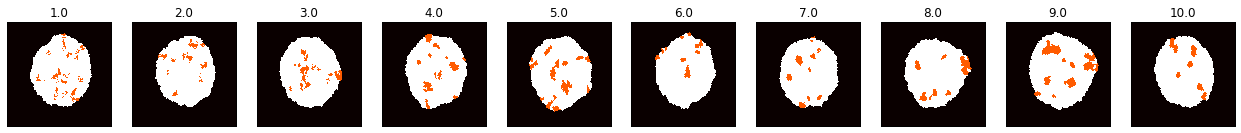

In [6]:
pix_width = 2048
pix_height = 800
dpi = 90

frame_num = -1
f_size_i = (pix_width/dpi, pix_height/dpi)

fig, axes = show_type(tumors, frame_num, f_size_i)

plt.savefig('types_{}.svg'.format(sim_name))



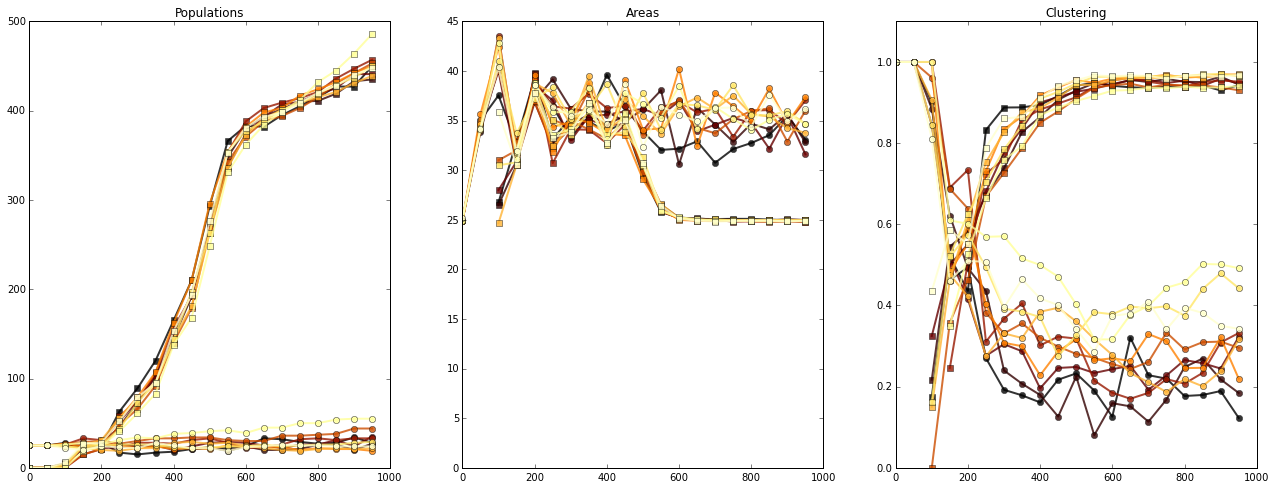

In [18]:
show_time_components(tumors, f_size_i)
plt.savefig('evolution_{}.svg'.format(sim_name))

In [19]:
data_dict = {}

data_dict['diff_adh'] = np.array([tumor.sim_dict['energies']['CancerStemCell-NonCancerous']
                                  for tumor in tumors.values()])

data_dict['pop_frac'] = np.array([tumor.n_npc.iloc[-1] / (tumor.n_csc.iloc[-1] +
                                                          tumor.n_npc.iloc[-1])
                                  for tumor in tumors.values()])

data_dict['area_frac'] = np.array([tumor.area_npc.iloc[-1] / tumor.area_csc.iloc[-1]
                                   for tumor in tumors.values()])

data_dict['clustering_npc'] = np.array([tumor.pis_npc.iloc[-5:].mean()
                                        for tumor in tumors.values()])

data_dict['clustering_csc'] = np.array([tumor.pis_csc.iloc[-5:].mean()
                                        for tumor in tumors.values()])


collected[sim_name] = pd.DataFrame.from_dict(data_dict)
collected[sim_name].set_index('diff_adh', inplace=True)
collected[sim_name].sort_index(inplace=True)


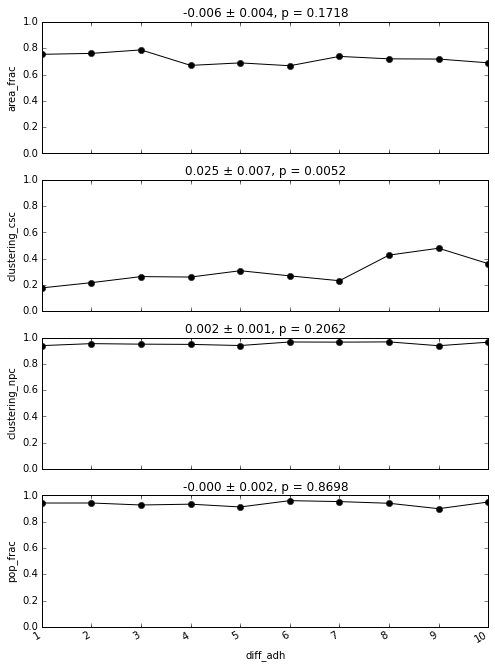

In [20]:
from scipy.stats import linregress
df = collected[sim_name]
axes = df.plot(subplots=True, figsize=(8, 12), style='ko-', legend=False)
for ax, col in zip(axes, df.columns):
    reg = linregress(df.index, df[col])
    ax.set_title(u'{:.3f} ± {:.3f}, p = {:.4f}'.format(reg.slope, reg.stderr, reg.pvalue))
    ax.set_ylabel(col)
    ax.set_ylim(0, 1)
plt.savefig('averages_{}.svg'.format(sim_name))

In [79]:
with pd.get_store('simulations.h5') as sim_store:
    for name, data in collected.items():
        sim_store[name] = data

/home/guillaume/anaconda/envs/py27/lib/python2.7/site-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: 'none_Ps0.6'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/guillaume/anaconda/envs/py27/lib/python2.7/site-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: 'none_Ps0.7'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/guillaume/anaconda/envs/py27/lib/python2.7/site-packages/tables/path.py:100: NaturalNameWarning: object name is not a valid Python identifier: 'none_Ps0.5'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; u

In [7]:
collected = {}
with pd.get_store('simulations.h5') as sim_store:
    for key in sim_store.keys():
        collected[key] = sim_store[key]

In [8]:
collected.keys()

['/Sim2_ParameterScan_after_ar02',
 '/Sim2_ParameterScan_none_ar_04',
 '/Sim2_ParameterScan_before_ar04',
 '/Sim2_ParameterScan_none_ar02',
 '/Sim2_ParameterScan_before_ar02']

In [124]:
res_

LinregressResult(slope=-0.017417515284514032, intercept=0.86051209971150966, rvalue=-0.29155264737822467, pvalue=0.44653355817994889, stderr=0.0215988206817402)

Sim2_ParameterScan_before_ar04, CSC: 0.066 ± 0.014, p = 0.003
Sim2_ParameterScan_before_ar04, NPC: -0.019 ± 0.014, p = 0.223
Sim2_ParameterScan_none_ar02, CSC: 0.044 ± 0.015, p = 0.019
Sim2_ParameterScan_none_ar02, NPC: 0.012 ± 0.010, p = 0.293
Sim2_ParameterScan_after_ar02, CSC: 0.097 ± 0.022, p = 0.003
Sim2_ParameterScan_after_ar02, NPC: -0.010 ± 0.006, p = 0.108
Sim2_ParameterScan_none_ar_04, CSC: 0.042 ± 0.008, p = 0.002
Sim2_ParameterScan_none_ar_04, NPC: 0.023 ± 0.006, p = 0.008
Sim2_ParameterScan_before_ar02, CSC: 0.088 ± 0.050, p = 0.121
Sim2_ParameterScan_before_ar02, NPC: -0.017 ± 0.022, p = 0.447


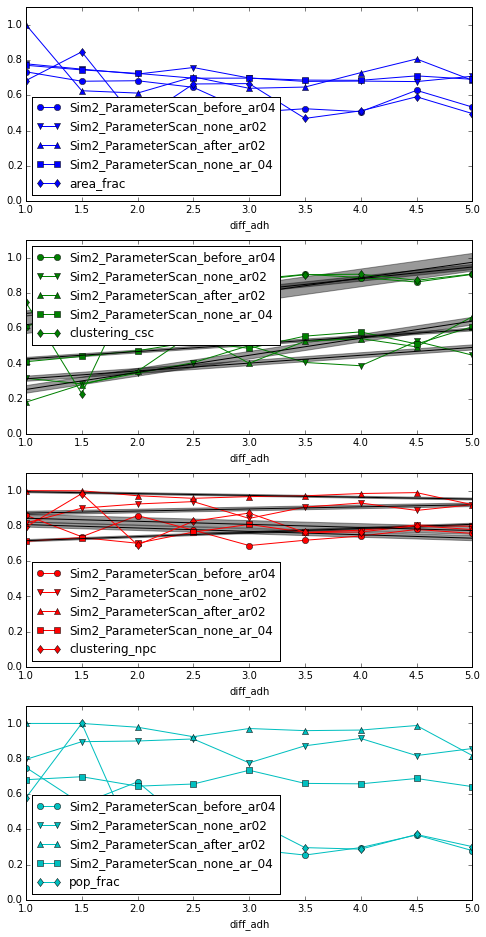

In [126]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

styles = {key:s for key, s in zip(collected, 'ov^sd')}
xs = np.linspace(1, 5, 30)

for key, df in collected.items():
    axes = df.plot(subplots=True, ax=axes, style='-'+styles[key], legend=True)
    for ax in axes:
        l = ax.lines[-1]
        l.set_label(key)
        
    res_ = linregress(df.index, df.clustering_csc)
    axes[1].plot(xs, res_.intercept + xs * res_.slope, 'k-')
    axes[1].fill_between(xs, res_.intercept - res_.stderr + xs * res_.slope,  
                         res_.intercept + res_.stderr + xs * res_.slope, alpha=0.4, color='k')
    print('{}, CSC: {:.3f} ± {:.3f}, p = {:.3f}'.format(key, res_.slope, res_.stderr, res_.pvalue))
    res_ = linregress(df.index, df.clustering_npc)
    axes[2].plot(xs, res_.intercept + xs * res_.slope, 'k-')
    axes[2].fill_between(xs, res_.intercept - res_.stderr + xs * res_.slope,  
                         res_.intercept + res_.stderr + xs * res_.slope, alpha=0.4, color='k')
    print('{}, NPC: {:.3f} ± {:.3f}, p = {:.3f}'.format(key, res_.slope, res_.stderr, res_.pvalue))
        
for ax in axes:
    ax.set_ylim(0, 1.1)

plt.savefig('sim_report.svg')

In [115]:
from scipy.stats import linregress
for df in collected.values():
    
    res_ = linregress(df.index, df.clustering_csc)
    axes[1].plot(xs, res_.intercept + xs * res_.slope)
    axes[1].fill_between(xs, res_.intercept - res_.stderr + xs * res_.slope,  
                         res_.intercept + res_.stderr + xs * res_.slope)
    
    res_ = linregress(df.index, df.clustering_npc)
    axes[2].plot(xs, res_.intercept + xs * res_.slope)
    axes[2].fill_between(xs, res_.intercept - res_.stderr + xs * res_.slope,  
                         res_.intercept + res_.stderr + xs * res_.slope)

/home/guillaume/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


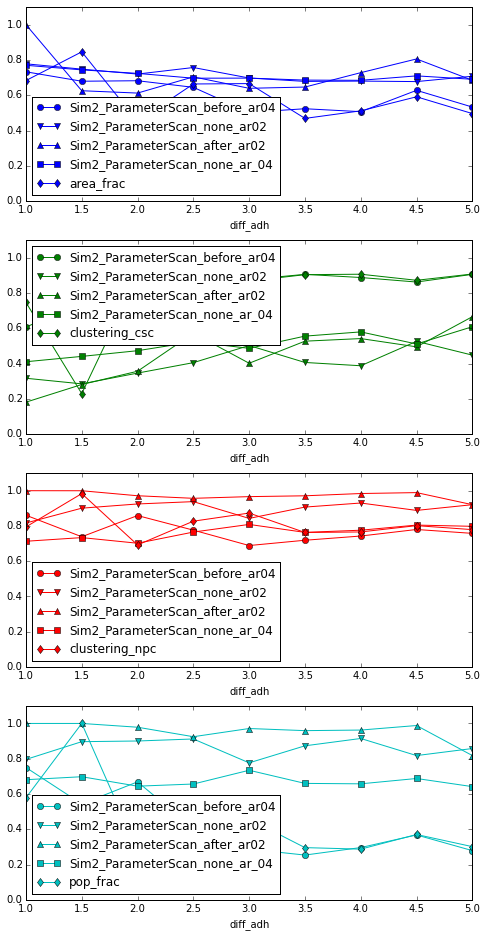

In [116]:
fig

In [ ]:
ax.fill_between()

In [113]:
res_.s

LinregressResult(slope=0.088495039484830715, intercept=0.53111104139672283, rvalue=0.55429899072459909, pvalue=0.12144849715403985, stderr=0.050224417763314509)

In [125]:
!ls

CompuCell3D simulations Importer.ipynb	simulations.h5
File Upload Widget.ipynb


In [123]:
collected

{'Sim2_ParameterScan_after_ar02':           area_frac  clustering_csc  clustering_npc   pop_frac
 diff_adh                                                      
 1.0        1.000489        0.180929        0.999134        inf
 1.5        0.625988        0.280927        0.998871        inf
 2.0        0.612692        0.356138        0.970522  45.800000
 2.5        0.704578        0.571598        0.955966  12.307692
 3.0        0.639727        0.401519        0.965557  33.857143
 3.5        0.646856        0.526592        0.970249  23.550000
 4.0        0.728369        0.541324        0.983120  25.705882
 4.5        0.806069        0.494433        0.988329  84.400000
 5.0        0.685040        0.665353        0.919907   4.495652,
 'Sim2_ParameterScan_before_ar02':           area_frac  clustering_csc  clustering_npc  pop_frac
 diff_adh                                                     
 1.0        0.683671        0.746207        0.793773  1.373932
 1.5        0.846349        0.229313   

In [15]:
from skimage import io

In [16]:
ls ../../InVivo_data/Data_neuroblasr/


im1_cells.tif  im1_types.tif  im2_data.csv   im3_cells.tif  im3_types.tif
im1_data.csv   im2_cells.tif  im2_types.tif  im3_data.csv


In [17]:
in_vivo_path = '../../InVivo_data/Data_neuroblasr/'
segmented = io.imread(os.path.join(in_vivo_path, 'im1_cells.tif'))
types = io.imread(os.path.join(in_vivo_path, 'im1_types.tif'))
data = pd.read_csv(os.path.join(in_vivo_path, 'im1_data.csv'), sep='\t')

In [50]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            214, 215, 216, 217, 218, 219, 220, 221, 222, 223],
           dtype='int64', length=224)

In [54]:
labels = (segmented[:, :, 0]).copy().astype(np.int)

for ix, cell in data.iterrows():
    x, y = int(cell.center_x_cells), int(cell.center_y_cells)
    color = segmented[y, x]
    labels[np.product(segmented == color, axis=2)] = ix
labels = morphology.erosion(labels, morphology.square(3))    

In [55]:
rag = graph.rag_mean_color(segmented, labels)

In [56]:
rag.edges()

[(0, 64),
 (0, 187),
 (0, 53),
 (2, 112),
 (2, 81),
 (2, 180),
 (2, 86),
 (2, 212),
 (2, 252),
 (2, 191),
 (3, 192),
 (3, 64),
 (3, 198),
 (3, 135),
 (3, 40),
 (3, 170),
 (3, 203),
 (3, 14),
 (3, 16),
 (3, 18),
 (3, 118),
 (3, 55),
 (3, 152),
 (3, 58),
 (8, 129),
 (8, 86),
 (8, 139),
 (8, 148),
 (8, 26),
 (8, 27),
 (8, 157),
 (8, 44),
 (8, 45),
 (8, 176),
 (8, 50),
 (8, 184),
 (8, 61),
 (8, 64),
 (8, 66),
 (8, 214),
 (8, 220),
 (8, 96),
 (8, 226),
 (8, 105),
 (8, 119),
 (8, 252),
 (9, 40),
 (9, 105),
 (9, 226),
 (9, 86),
 (9, 49),
 (13, 225),
 (13, 17),
 (13, 33),
 (13, 70),
 (13, 113),
 (13, 139),
 (13, 44),
 (13, 81),
 (13, 179),
 (13, 22),
 (13, 185),
 (13, 132),
 (13, 36),
 (13, 223),
 (14, 64),
 (14, 37),
 (14, 200),
 (14, 170),
 (14, 140),
 (14, 205),
 (14, 104),
 (14, 86),
 (14, 250),
 (14, 150),
 (14, 133),
 (16, 197),
 (16, 203),
 (16, 53),
 (16, 55),
 (16, 152),
 (17, 67),
 (17, 197),
 (17, 230),
 (17, 139),
 (17, 140),
 (17, 203),
 (17, 22),
 (17, 250),
 (17, 126),
 (18, 49)

In [51]:
from skimage import morphology

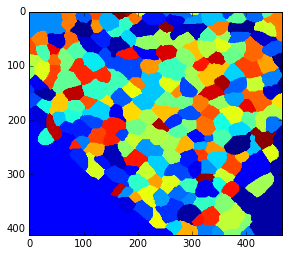

In [58]:
fig, ax = plt.subplots()
ax.imshow(labels)

In [18]:
from scipy.spatial import Delaunay

In [21]:
points = data[['center_x_cells', 'center_y_cells']]
delaunay = Delaunay(points)

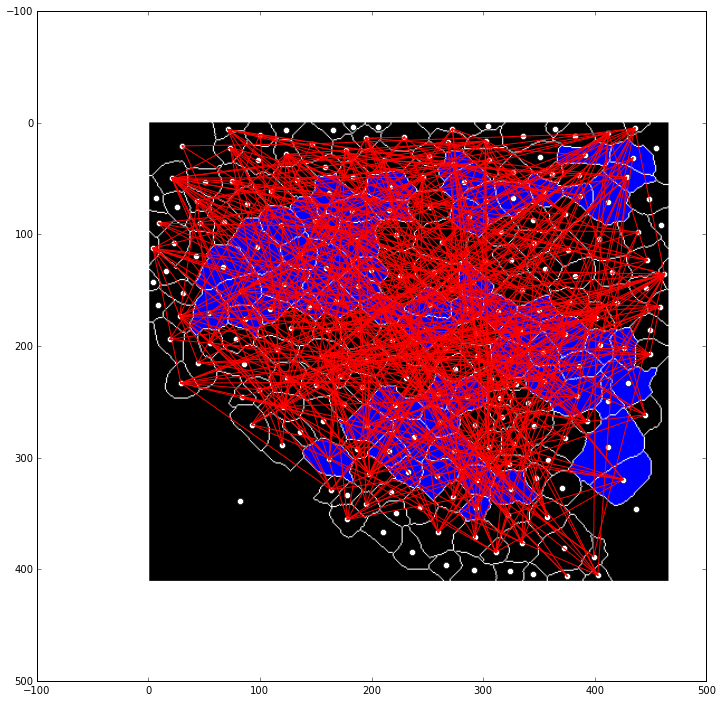

In [57]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(types)
ax.plot(data.center_x_cells, 
        data.center_y_cells, 'wo')
for srce, trgt in rag.edges_iter():
    try:
        ax.plot(data.loc[[srce, trgt], 'center_x_cells'],
                data.loc[[srce, trgt], 'center_y_cells'], 'r-')
    except:
        continue

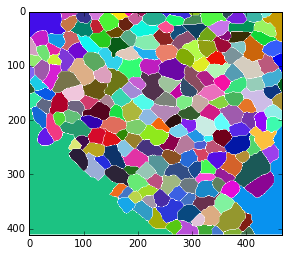

In [23]:
plt.imshow(segmented)

In [35]:
edges = []
for s in delaunay.simplices:
    edges.append([(s[0], s[1]),
                  (s[0], s[2]),
                  (s[1], s[2])])

In [25]:
types.shape, segmented.shape

((412, 467, 3), (412, 467, 3))

In [26]:
np.unique(types)

array([  0, 255], dtype=uint8)

In [27]:
types.shape

(412, 467, 3)

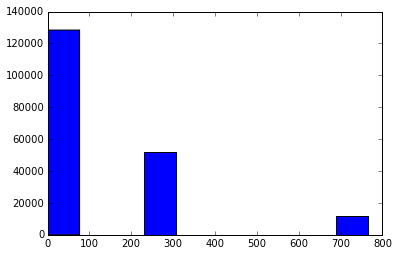

In [33]:
fig, ax =  plt.subplots()

h = ax.hist(types.sum(axis=2).ravel())

In [34]:
255*3

765

In [ ]:
segemented